In [15]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
# 매직 명령 : 주피터 노트북 사용 시
# 노트북 내부에 그림을 표시하도록 지정하는 명령어

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn import datasets

In [41]:
df =pd.read_csv("/Users/crlee/pandas/서울시_골목상권_스케일링.csv", thousands= ',', encoding='cp949')

In [44]:
df2 = df.loc[:, ~df.columns.isin(['상권_코드_명','시군구_명'])]
df2
#필요없는 변수 삭제

,상권별_매출액_평균,점포_수,식료품_지출_총금액,교통_지출_총금액,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수,상권별_매출건수_평균,프랜차이즈_점포_수,개업_점포_수,폐업_점포_수
0,-0.042609,-0.324363,-0.180160,-0.204429,-0.180923,-0.091914,-0.185341,0.156083,0.740132,-0.113868,-0.522115
1,-0.282165,-1.186330,-0.382371,-0.653202,-0.933633,-0.738919,-1.185251,0.487055,-0.541101,-1.115043,-1.469039
2,-0.080340,0.240921,-0.246836,-0.241533,0.522230,0.728681,0.497718,0.355192,0.593045,0.587447,0.424809
3,-0.430378,-0.324363,0.237345,0.246144,-0.029849,-0.009234,0.115979,-0.256888,-0.170471,-0.228989,0.031800
4,0.075029,0.451441,0.042486,-0.072796,0.844757,0.985235,0.756472,0.085594,0.222414,0.696803,0.729650
...,...,...,...,...,...,...,...,...,...,...,...
1082,1.854051,-1.155195,-1.121434,-1.132988,-8.133096,-7.987989,-7.412568,0.609936,-1.103786,-1.115043,-0.522115
1083,1.398018,-1.186330,-0.466656,-0.370682,-3.314819,-3.229080,-3.997228,1.071651,-2.313929,-0.672016,-0.522115
1084,1.693443,-1.788157,-0.794214,-0.643076,-1.361682,-1.558615,-1.120688,-0.099126,-1.550414,-1.115043,-1.469039
1085,-1.278567,-0.743138,-0.474913,-0.341473,0.276917,0.258693,0.110911,-0.729702,-1.103786,-0.228989,-0.522115


데이터를 train valid 나누었습니다. 그 후 gridsearchCV를 통해 파라미터를 조절했습니다.

In [62]:
# 레이블 데이터 세트 : 결정값 (Label)
y = df2['상권별_매출액_평균']

# 피처 데이터 세트
# 결정값으로 사용한 '상권별_매출액_평균' 제외한 나머지 모든 데이터
X = df2.drop('상권별_매출액_평균', axis=1)

# 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = RandomForestRegressor(random_state=1, min_samples_leaf=35, max_depth=10)


# 모델 학습
model.fit(X_train, y_train)

# 모델 평가
print("train set Tree", model.score(X_train, y_train, sample_weight=None))
print("test set Tree", model.score(X_test, y_test, sample_weight=None))


train_predict = model.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
train_rmse = math.sqrt(train_mse)
#MSE 값이 작을수록 모델의 예측이 실제 값과 가깝다는 것을 의미
print("MSE:", train_mse)
# RMSE 실제값과 예측값의 차이 : 값이 작을수록 좋음 
print("RMSE:", train_rmse )


RandomForestRegressor(max_depth=10, min_samples_leaf=35, random_state=1)

train set Tree 0.6067254303931107
test set Tree 0.46235257993169254
MSE: 0.3609390375251022
RMSE: 0.6007820216393814


In [63]:
# # 레이블 데이터 세트 : 결정값 (Label)
# y = df2['상권별_매출액_평균']

# # 피처 데이터 세트
# # 결정값으로 사용한 '상권별_매출액_평균' 제외한 나머지 모든 데이터
# X = df2.drop('상권별_매출액_평균', axis=1)

# # 데이터 분할 
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# 하이퍼파라미터 그리드 설정
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8],
    'min_samples_leaf': [8, 18],
    'min_samples_split': [8, 16]
}

# RandomForestRegressor 모델 생성
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

# 그리드 서치를 통한 최적의 하이퍼파라미터 탐색
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 예측 정확도 출력
print('최적 하이퍼파라미터:', grid_cv.best_params_)
print('최고 예측 성능: {0:.4f}'.format(grid_cv.best_score_))

rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=100)
rf.fit(X_train, y_train)

# train rmse
train_predict = rf.predict(X_train)
train_predict = rf.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("MSE: {}".format(train_mse))

print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8], 'min_samples_leaf': [8, 18],
                         'min_samples_split': [8, 16],
                         'n_estimators': [100, 200]})

최적 하이퍼파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 성능: 0.5870


RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      random_state=0)

MSE: 0.24024074183631244
RMSE:0.4901435930789185


# 랜덤포레스트 득점모델 학습을 진행하였습니다. 
#GridSearchCV를 통해 파라미터를 찾아 
#이를 적용해 랜덤포레스트 모델을 만든후 학습데이터를 넣어서 모델을 학습시켰습니다.

In [50]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      random_state=0)

In [51]:
# train rmse
train_predict = rf.predict(X_train)# train mse
train_predict = rf.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("MSE: {}".format(train_mse))

print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
 

MSE: 0.24024074183631244
RMSE:0.4901435930789185


점포_수               0.079954
식료품_지출_총금액         0.007754
교통_지출_총금액          0.002678
시간대_아침점심_생활인구_수    0.003521
시간대_오후저녁_생활인구_수    0.002330
시간대_밤새벽_생활인구_수     0.011245
상권별_매출건수_평균        0.882303
프랜차이즈_점포_수         0.001510
개업_점포_수            0.003273
폐업_점포_수            0.005433
dtype: float64

<Axes: >

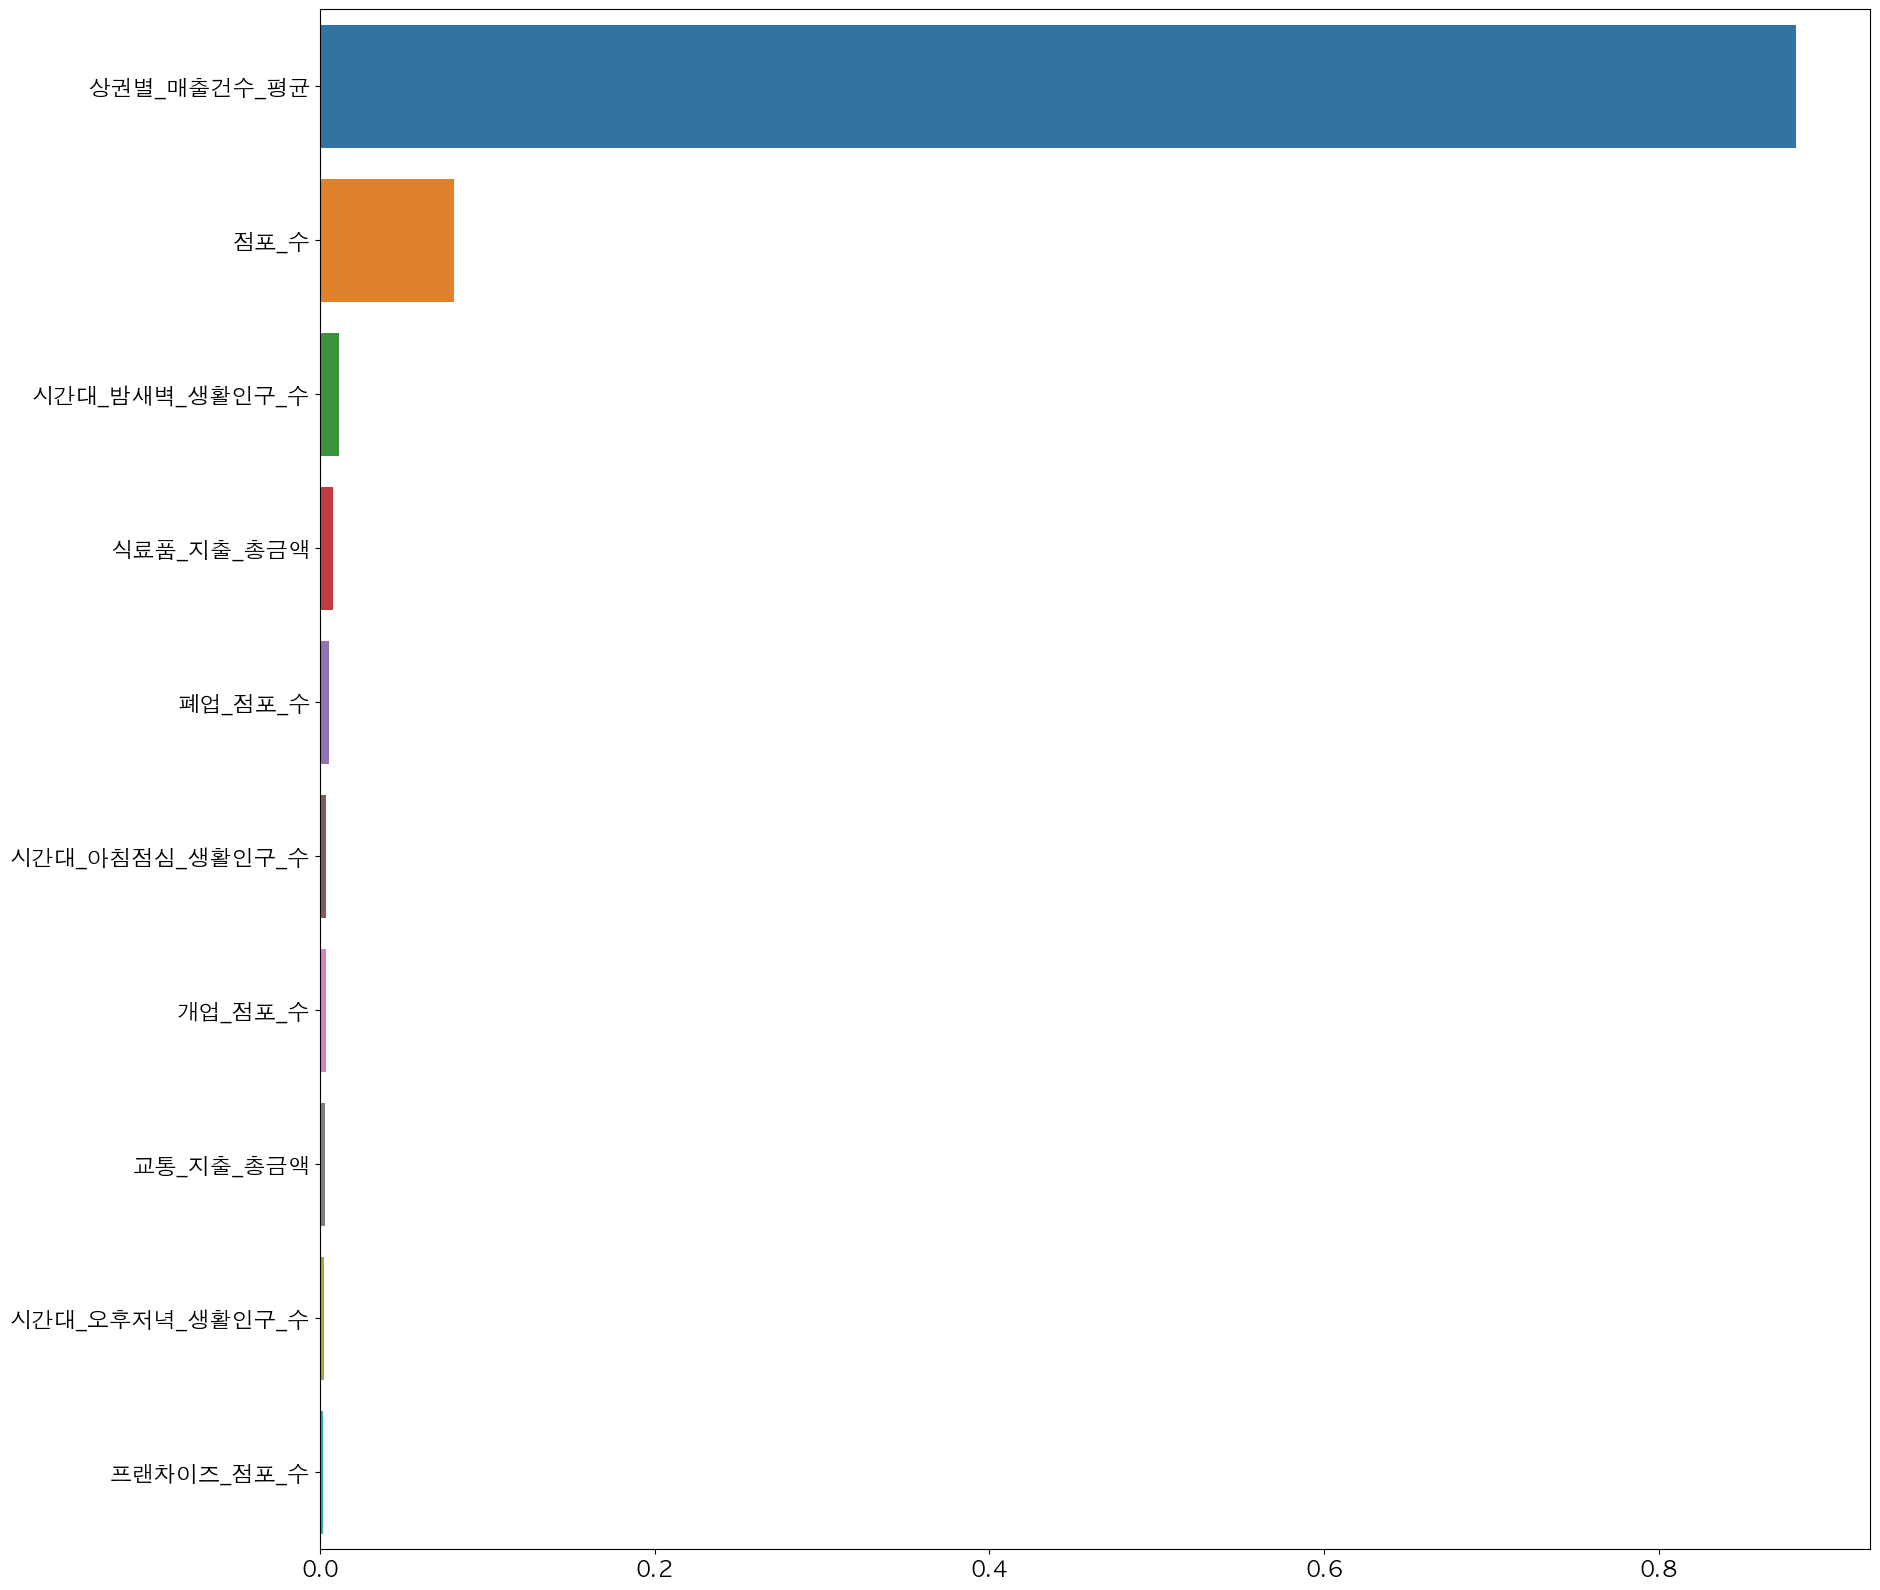

In [61]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline
 
# ftr_importances_values = rf_run.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
# plt.figure(figsize=(8, 6))
# sns.barplot(x=ftr_top, y=ftr_top.index)
# plt.show()

# feature_importances_ 메소드로 피처 중요도 확인
feature_series = pd.Series(data= model.feature_importances_, index=X.columns )
feature_series

feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


###### <xgm부스트> <light gbm>, 발표 자료 및 대본 튜닝 전과 후, cv50  이랬고 저랬다... 

In [53]:
############ xgboost, lightbgm

In [54]:
#!pip install xgboost

In [55]:
#!pip install lightgbm

In [56]:
#데이터 분할로 검증데이터의 비율을 가져오고 모델학습 진행

In [57]:
# Data split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# XGBoost model creation
xgb_model = xgb.XGBRegressor(random_state=0, max_depth=5, min_child_weight=8, colsample_bytree=0.8, learning_rate=0.1, n_estimators=200)

# Model training
xgb_model.fit(X_train, y_train)

# Train RMSE
train_predict = xgb_model.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(train_predict, y_train))
print("XGBoost Train RMSE: {}".format(train_rmse))

# Train MSE
train_predict = xgb_model.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("XGBoost Train MSE: {}".format(train_mse))

NameError: name 'xgb' is not defined

In [58]:
###

In [59]:
# LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 200
}

# Training the LightGBM model
lgb_model = lgb.train(params, train_data)

# Predicting on the training set
train_predict = lgb_model.predict(X_train)
train_rmse = math.sqrt(mean_squared_error(train_predict, y_train))
print("LightGBM Train RMSE: {}".format(train_rmse))

# Predicting on the training set
train_predict = lgb_model.predict(X_train)
train_mse = mean_squared_error(train_predict, y_train)
print("LightGBM Train MSE: {}".format(train_mse))

NameError: name 'lgb' is not defined

In [60]:
print("Train RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
print("Train MSE: {}".format(train_mse))
##
print("XGBoost Train RMSE: {}".format(train_rmse))
print("XGBoost Train MSE: {}".format(train_mse))
##
print("LightGBM Train RMSE: {}".format(train_rmse))
print("LightGBM Train MSE: {}".format(train_mse))

Train RMSE':0.4901435930789185
Train MSE: 0.24024074183631244
XGBoost Train RMSE: 0.6007820216393814
XGBoost Train MSE: 0.24024074183631244
LightGBM Train RMSE: 0.6007820216393814
LightGBM Train MSE: 0.24024074183631244
